In [150]:
import os.path
import cv2
import json
import numpy as np
import pandas as pd
import albumentations as A
from albumentations.pytorch import ToTensorV2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image, ImageDraw

import matplotlib.pyplot as plt

import albumentations as A 
from sahi.utils.file import load_json, save_json
from tqdm import tqdm

In [151]:
coco_file_name  = "cassette_val"

# Determine target split from coco_file_name
target_split = None
if "train" in coco_file_name.lower():
    target_split = "train"
elif "test" in coco_file_name.lower():
    target_split = "test"
elif "val" in coco_file_name.lower():
    target_split = "val"
if not target_split:
    raise ValueError("Unable to determine target split from coco_file_name.")

print(target_split)

DATA_DIR = os.path.join("..", "testy")
COCO_DIR = os.path.join(DATA_DIR, "coco")

ORG_ANNOTATION_PATH = os.path.join(DATA_DIR, "coco",target_split, f"{coco_file_name}_corrected_coco.json")
SLC_ANNOTATION_PATH = os.path.join(DATA_DIR, "coco",target_split, f"{coco_file_name}_sliced_coco.json")

print(ORG_ANNOTATION_PATH)

#IMAGE_DIR = os.path.join(COCO_DIR, "images")
IMAGE_DIR = os.path.join(COCO_DIR, "images")
SLICED_IMAGE_DIR = os.path.join(COCO_DIR, "images_sliced",coco_file_name)

BBOX_VISUALIZATION_DIR = os.path.join(DATA_DIR, "bbox_vis", coco_file_name)
BBOX_SAVE_DIR = os.path.join(BBOX_VISUALIZATION_DIR,"each") #Place to savea each of the before augmented bounding boxes

os.path.exists(DATA_DIR)
os.path.exists(COCO_DIR)

os.path.exists(ORG_ANNOTATION_PATH)
os.path.exists(IMAGE_DIR)
os.path.exists(BBOX_VISUALIZATION_DIR)

if not os.path.exists(BBOX_SAVE_DIR):
    os.makedirs(BBOX_SAVE_DIR)

val
..\testy\coco\val\cassette_val_corrected_coco.json


In [152]:
coco_dict = load_json(ORG_ANNOTATION_PATH)
[img.update({"file_name": img["file_name"].split("/")[-1]}) for img in coco_dict["images"]]
save_json(coco_dict, save_path=ORG_ANNOTATION_PATH)

coco_dict

{'images': [{'width': 4096,
   'height': 2000,
   'id': 4,
   'file_name': '01BN02.bmp'}],
 'annotations': [{'id': 98,
   'image_id': 4,
   'category_id': 5,
   'segmentation': [],
   'bbox': [2214.833880112831,
    223.5076988929449,
    21.737717054118985,
    45.54569287529642],
   'ignore': 0,
   'iscrowd': 0,
   'area': 990.0593847569965},
  {'id': 99,
   'image_id': 4,
   'category_id': 5,
   'segmentation': [],
   'bbox': [2729.2931837269757,
    203.84024060588504,
    28.983622738824923,
    38.29978719059021],
   'ignore': 0,
   'iscrowd': 0,
   'area': 1110.066582909346},
  {'id': 100,
   'image_id': 4,
   'category_id': 5,
   'segmentation': [],
   'bbox': [1882.5573479998739,
    603.4001826482585,
    12.421552602353332,
    22.772846437648226],
   'ignore': 0,
   'iscrowd': 0,
   'area': 282.87410993056216},
  {'id': 101,
   'image_id': 4,
   'category_id': 7,
   'segmentation': [],
   'bbox': [2414.76780379523,
    623.8160249415288,
    6.427339063585387,
    8.7645532

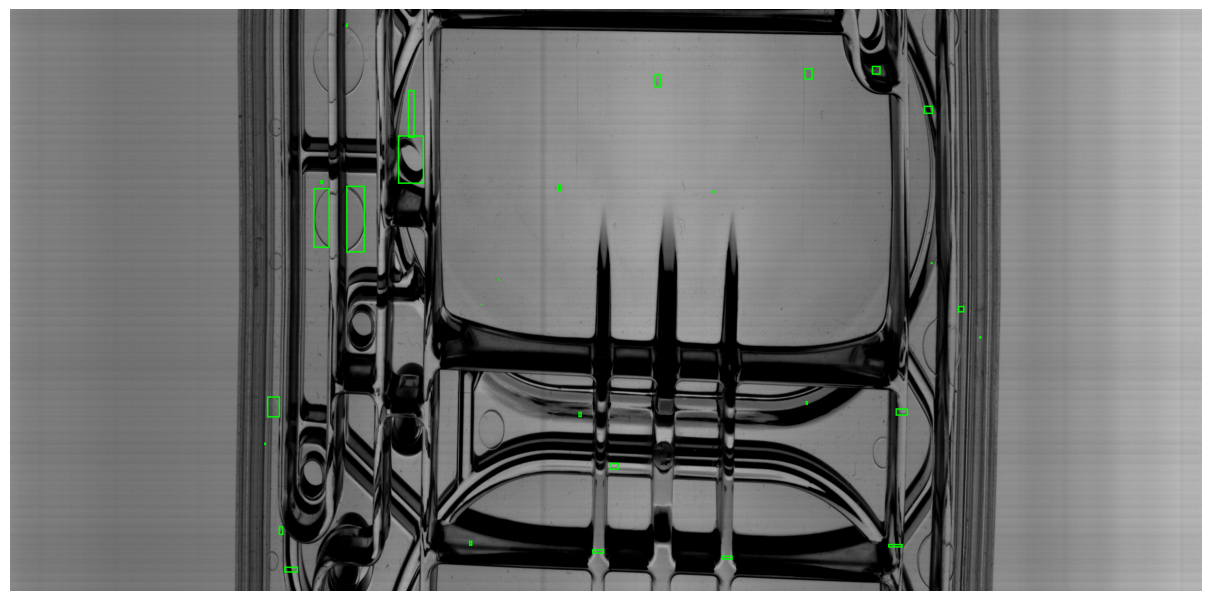

In [153]:
for img in coco_dict["images"]:
    fig, ax = plt.subplots(1, 1, figsize=(12, 9), constrained_layout=True)

    mono_img = Image.open(os.path.join(IMAGE_DIR,img["file_name"])).convert("L")
    rgb_img = Image.merge("RGB", (mono_img, mono_img, mono_img))

    # iterate over all annotations
    for ann_ind in range(len(coco_dict["annotations"])):
        
        if coco_dict["annotations"][ann_ind]["image_id"] == img["id"]:
            # convert coco bbox to pil bbox
            xywh = coco_dict["annotations"][ann_ind]["bbox"]
            xyxy = [xywh[0], xywh[1], xywh[0]+xywh[2], xywh[1]+xywh[3]]

            # visualize bbox over image
            ImageDraw.Draw(rgb_img).rectangle(xyxy, width=5, outline="lime")

    ax.axis("off")
    ax.imshow(rgb_img)
    fig.savefig(os.path.join(BBOX_SAVE_DIR, img["file_name"][:-4] + ".png")) #save each of the image o

In [154]:
slc_dict= load_json(SLC_ANNOTATION_PATH)
print(SLC_ANNOTATION_PATH)

slc_dict

SLICED_IMAGE_DIR

..\testy\coco\val\cassette_val_sliced_coco.json


'..\\testy\\coco\\images_sliced\\cassette_val'

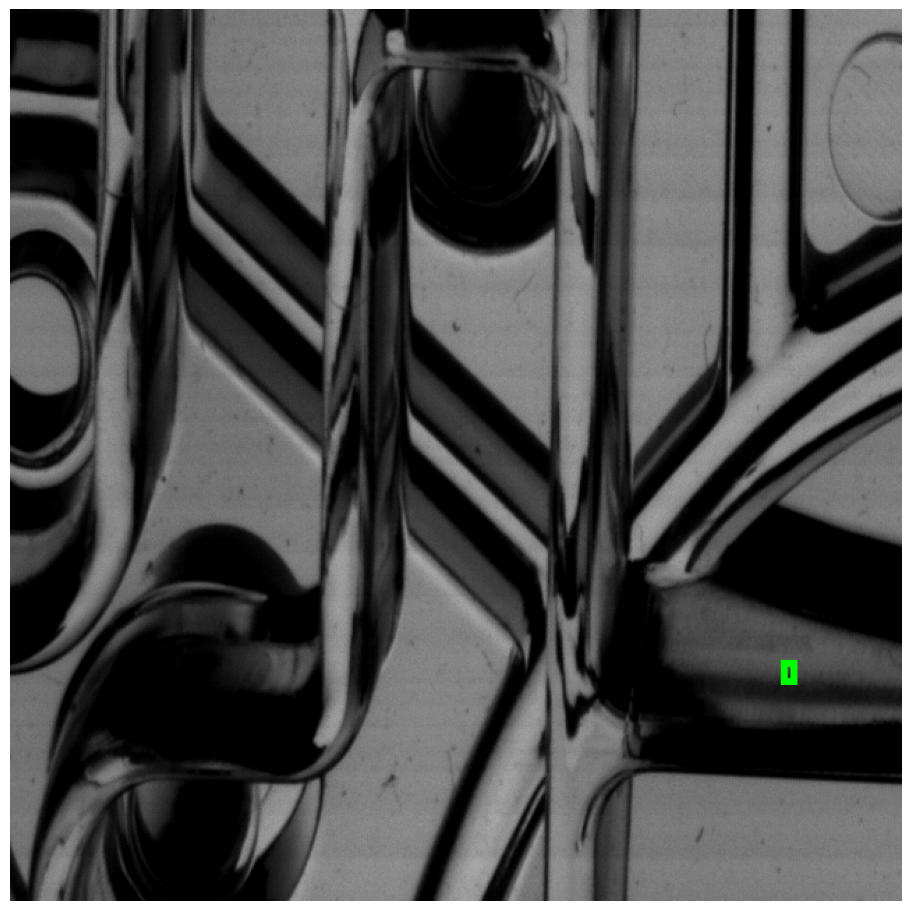

In [155]:
for img in slc_dict["images"]:
    fig, ax = plt.subplots(1, 1, figsize=(12, 9), constrained_layout=True)
    
    # Open the sliced image file in grayscale, convert it to RGB
    sliced_img_path = os.path.join(SLICED_IMAGE_DIR, img["file_name"])
    mono_img = Image.open(sliced_img_path).convert("L")
    rgb_img = Image.merge("RGB", (mono_img, mono_img, mono_img))
    
    # Iterate over all annotations for this specific image
    for annotation in slc_dict["annotations"]:
        if annotation["image_id"] == img["id"]:
            # Extract and convert bounding box coordinates
            xywh = annotation["bbox"]
            xyxy = [xywh[0], xywh[1], xywh[0] + xywh[2], xywh[1] + xywh[3]]
            
            # Draw the bounding box on the image
            ImageDraw.Draw(rgb_img).rectangle(xyxy, width=5, outline="lime")
    
    # Display and save the image with bounding boxes
    ax.axis("off")
    ax.imshow(rgb_img)
    fig.savefig(os.path.join(BBOX_SAVE_DIR, img["file_name"][:-4] + ".png")) #save each of the image to folder called Each

### FULL IMAGE AUGMENTATION